In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
most_recent = dt.date(2017, 8, 23)
one_year_from_last = most_recent - dt.timedelta(days=365)
print(one_year_from_last)

2016-08-23


In [31]:
# Perform a query to retrieve the data and precipitation scores
year_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_from_last).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_df = pd.DataFrame(year_query).rename(columns = {"date":"Date", "prcp":"precipitation"})
# Sort the dataframe by date
year_df = year_df.set_index("Date")
year_df = year_df.sort_values("Date")
year_df.head()

,precipitation
Date,
2016-08-23,0.0
2016-08-23,NaN
2016-08-23,45.5
2016-08-23,1.3
2016-08-23,3.8


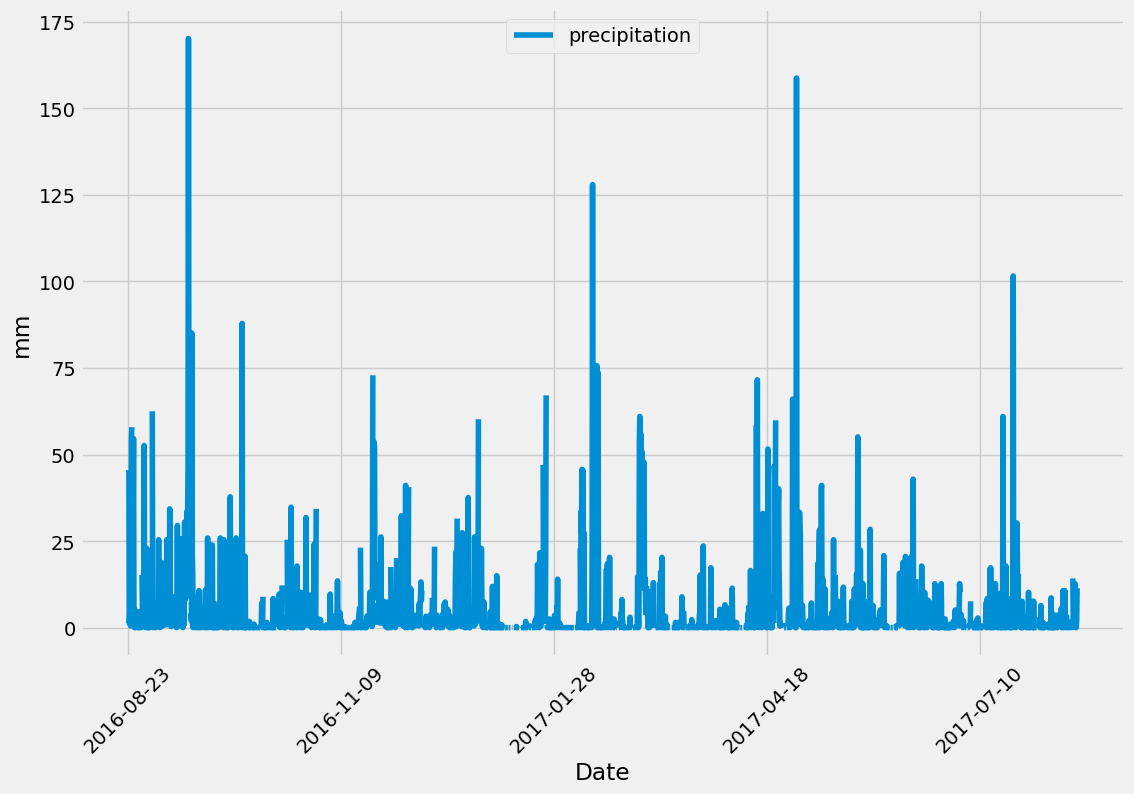

In [34]:
# Use Pandas Plotting with Matplotlib to plot the data
year_df.plot(rot=45, figsize=(12,8))
plt.legend(loc = "upper center")
plt.xlabel("Date")
plt.ylabel("mm")
plt.show()

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data
year_df.describe()

,mm
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number of stations in the dataset
no_stations = session.query(Station).distinct().count()
no_stations

9

In [37]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [Measurement.station, 
       func.count(Measurement.id)]
active_stations = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
active_stations
#USC00519281 is the most active station as it has the highest number of observations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel =  [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)] 
station_stats = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()
print(station_stats)

(12.2, 29.4, 22.03582251082252)


In [53]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
active_year = session.query(Measurement.date, Measurement.tobs).filter_by(station = "USC00519281").\
    filter(Measurement.date >= one_year_from_last).all()

# Create dataframe for plotting histogram
active_year_df = pd.DataFrame(active_year)

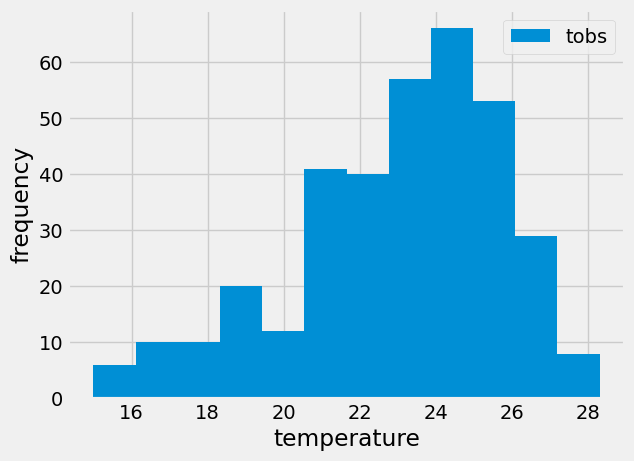

In [54]:
#plot the results as a histogram
active_year_df.plot(kind = 'hist', bins = 12)
plt.xlabel("temperature")
plt.ylabel("frequency")
plt.show()

# Close Session

In [55]:
# Close Session
session.close()